**CO2 EMMISION DATA WITH PANDAS** 

In [1]:
import pandas as pd

In [2]:
co2data = pd.read_csv("co2_emission.csv")

In [3]:
co2data.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [4]:
co2data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          20853 non-null  object 
 1   Code                            18646 non-null  object 
 2   Year                            20853 non-null  int64  
 3   Annual CO₂ emissions (tonnes )  20853 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.8+ KB


<u>**DATAFRAME TECHNICAL ATTRIBUTES**</u>

 - Entity: Refers to country
 - Code: Abbreviation for country name 
 - Year : As name implies represents the year in question
 - Annual CO₂ emissions (tonnes ) : Describes the amount of CO2 emitted  given period in Metric Tonnes for the country in question.
 
*Note : All columns seem to be complete except for the Code column which seems to have **2,207 missing values**. Although this is still a realization at almost scratch level it is worthy of note. Further interaction might reveal more reason*

In [5]:
co2data.describe()

,Year,Annual CO₂ emissions (tonnes )
count,20853.000000,2.085300e+04
mean,1953.339424,1.930517e+08
std,57.903089,1.345143e+09
min,1751.000000,-6.255223e+08
25%,1932.000000,3.187680e+05
50%,1971.000000,3.828880e+06
75%,1995.000000,3.706898e+07
max,2017.000000,3.615326e+10


In [6]:
co2data.describe(include = ["O"])

,Entity,Code
count,20853,18646
unique,233,222
top,Middle East,USA
freq,267,267


In [7]:
pd.set_option("display.max_rows", 10, "display.max_columns", 10)

# co2data.groupby("Entity").count()

In [8]:
# co2data[co2data.Entity == "Americas (other)"]

In [9]:
pd.set_option("display.max_rows", 50, "display.max_columns", 50)
co2data.groupby("Entity").sum()

,Year,Annual CO₂ emissions (tonnes )
Entity,,
Afghanistan,136827,1.785029e+08
Africa,503028,4.311757e+10
Albania,167875,2.772782e+08
Algeria,211998,4.107870e+09
Americas (other),503028,9.864116e+10
...,...,...
Wallis and Futuna Islands,34153,4.295732e+05
World,503028,1.575244e+12
Yemen,134878,6.194328e+08


In [10]:
co2data["CO₂ emissions (Kilo-tonnes )"] = (co2data["Annual CO₂ emissions (tonnes )"]/1000000).round(2)
# Our emmisions are now converted into kilo-tonnes

In [11]:
# FILTER ONLY REQUIRED COLUMNS AND OMIT THE Annual CO₂ emissions (tonnes ) COLUMN
co2data = co2data[["Entity", "Code", "Year", "CO₂ emissions (Kilo-tonnes )"]]

In [12]:
sum_of_years = co2data.groupby("Entity").sum().reset_index()

In [13]:
sum_of_years

,Entity,Year,CO₂ emissions (Kilo-tonnes )
0,Afghanistan,136827,178.46
1,Africa,503028,43117.59
2,Albania,167875,277.23
3,Algeria,211998,4107.85
4,Americas (other),503028,98640.98
...,...,...,...
228,Wallis and Futuna Islands,34153,0.44
229,World,503028,1575244.36
230,Yemen,134878,619.42
231,Zambia,117292,187.39


In [14]:
sorted_total_emmisions = sum_of_years.sort_values("CO₂ emissions (Kilo-tonnes )", ascending = False)

In [15]:
continent_only_mask = sorted_total_emmisions["Entity"].str.contains("other") # FILTER ONLY CONTINENTS USING THE KEYWORD OTHER

In [16]:
sorted_total_emmisions[continent_only_mask]

,Entity,Year,CO₂ emissions (Kilo-tonnes )
13,Asia and Pacific (other),503028,178057.26
71,Europe (other),503028,157540.16
4,Americas (other),503028,98640.98


In [17]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [18]:
# co2data[co2data["Entity"] == "Europe (other)"]

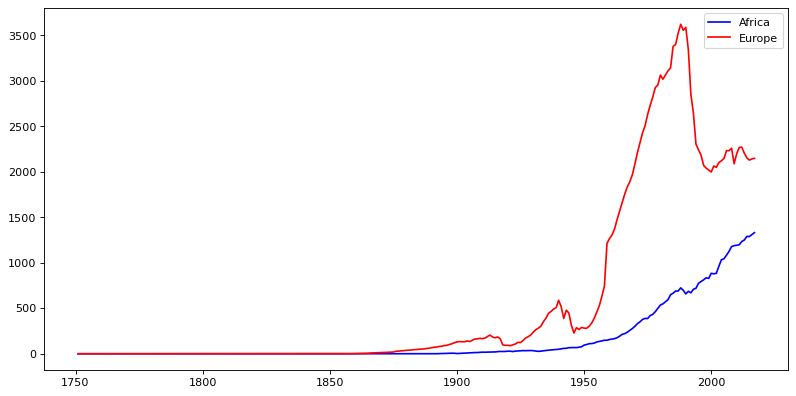

In [19]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(co2data[co2data["Entity"] == "Africa"].Year, 
         co2data[co2data["Entity"] == "Africa"]["CO₂ emissions (Kilo-tonnes )"], 
         color = "b", label = "Africa")
plt.plot(co2data[co2data["Entity"] == "Europe (other)"].Year, 
         co2data[co2data["Entity"] == "Europe (other)"]["CO₂ emissions (Kilo-tonnes )"], 
         color = "r", label = "Europe")

plt.legend()

In [27]:
(co2data[(co2data["Entity"] == "Europe (other)") | (co2data["Entity"] == "Africa")])#["CO₂ emissions (Kilo-tonnes )"].diff()

,Entity,Code,Year,CO₂ emissions (Kilo-tonnes )
69,Africa,NaN,1751,0.00
70,Africa,NaN,1752,0.00
71,Africa,NaN,1753,0.00
72,Africa,NaN,1754,0.00
73,Africa,NaN,1755,0.00
...,...,...,...,...
6871,Europe (other),NaN,2013,2205.19
6872,Europe (other),NaN,2014,2154.82
6873,Europe (other),NaN,2015,2129.33
6874,Europe (other),NaN,2016,2142.33


In [38]:
n_steps = 2
def my_fun(x):
    return x.iloc[-1] - x.iloc[0]

rolling_differences = co2data["CO₂ emissions (Kilo-tonnes )"].rolling(window=n_steps).apply(my_fun)

In [39]:
new_df = pd.DataFrame()
new_df["Year"] = co2data["Year"].iloc[1:]
new_df["Differences"] = rolling_differences

In [40]:
new_df

,Year,Differences
1,1950,0.07
2,1951,0.01
3,1952,0.00
4,1953,0.02
5,1954,0.00
...,...,...
20848,2013,3.93
20849,2014,0.33
20850,2015,-0.96
20851,2016,-0.98


In [73]:
# FILTER REQUIRED COUNTRY ONLY DATA
target_country_data = co2data[co2data["Entity"] == "Africa"]

# GET ROLLING DIFFERENCE FOR DATA
rolling_differences = target_country_data["CO₂ emissions (Kilo-tonnes )"].diff() 

# CREATE NEW EMPTY DATAFRAME AND ADD YEAR FROM TARGET COUNTRY AND ROLLING DIFFERENCES CALCULATED
new_df = pd.DataFrame()
new_df["Year"] = target_country_data["Year"].iloc[1:]
new_df["Differences"] = rolling_differences

year_of_max_increase = new_df[new_df.Differences == new_df.Differences.max()]
year_of_max_increase

,Year,Differences
321,2003,77.82


In [74]:
import seaborn as sns


<AxesSubplot:xlabel='Year', ylabel='CO₂ emissions (Kilo-tonnes )'>

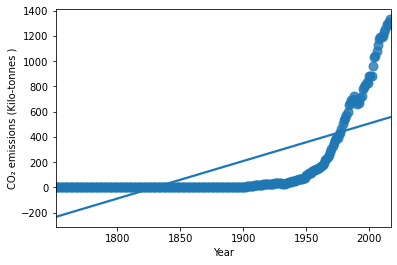

In [86]:
# sns.lmplot("Year","CO₂ emissions (Kilo-tonnes )", data = target_country_data, fit_reg=True)
sns.regplot(x="Year", y="CO₂ emissions (Kilo-tonnes )", data=target_country_data,
                 scatter_kws={"s": 80},
                 order=1, ci=None)